In [72]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
import api_keys

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy



# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [73]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)


613

## Perform API Calls

In [74]:
# # OpenWeatherMap API Key

# # url = "http://api.openweathermap.org/data/2.5/weather?"
# # Starting URL for Weather Map API Call
# url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key 
# import openweathermapy.core as owm
# units = "metric"
# query_url = f"{url}&units={units}&q="
# settings = {"units": "metric", "appid": api_key}

In [75]:
# current_weather_paris = owm.get_current("rome", **settings)
# print(f"Current weather object for Paris: {current_weather_paris}.")

In [76]:
# summary = ["name", "main.temp","wind.speed","main.humidity",'coord.lon','clouds']

# data = current_weather_paris(*summary)
# print(f"The current weather summary for Paris is: {data}.")

In [80]:
# q=['cairo','miami','washington','rome','zzz','deli','ddd','vegas','jjj','paris']
# name=[]
# lat = []
# temp = []
# hum=[]
# wind=[]
# cloud=[]
# lon=[]

# for city in q:
#     try:
#         for city in q:
#             response = requests.get(query_url + city).json()
#             lat.append(response['coord']['lat'])
#     #         temp.append(response['main']['temp'])
#     #         hum.append(response['main']['humidity'])
#     #         wind.append(response['wind']['speed'])
#     #         lon.append(response['coord']['lon'])
#     #         cloud.append(response['clouds']['all'])
#             name.append(city)
#             q.remove(city)


#     except KeyError:
#         q.remove(city)

In [81]:
# name

['cairo', 'washington', 'miami', 'deli', 'vegas', 'paris', 'rome']

In [82]:
# len(lat)

7

In [83]:


name=[]
lat = []
temp = []
hum=[]
wind=[]
cloud=[]
lon=[]

for city in cities:
    try:
        for city in cities:
            response = requests.get(query_url + city).json()
            lat.append(response['coord']['lat'])
            temp.append(response['main']['temp'])
            hum.append(response['main']['humidity'])
            wind.append(response['wind']['speed'])
            lon.append(response['coord']['lon'])
            cloud.append(response['clouds']['all'])
            name.append(city)
            cities.remove(city)


    except KeyError:
        cities.remove(city)


In [84]:
len(cloud)

508

In [85]:
weather_dict = {
    "city": name,
    "latitude": lat,
    "temp": temp,
    "humidity": hum,
    "Wind_Speed": wind,
    "Cloudiness": cloud,
    "longitude": lon    
}
weather_data = pd.DataFrame(weather_dict)
weather_data.to_csv("output_data/cities.csv")
weather_data.head()

,city,latitude,temp,humidity,Wind_Speed,Cloudiness,longitude
0,taywarah,33.35,63.93,29,2.95,0,64.42
1,east london,-33.02,57.20,82,5.82,0,27.91
2,anton lizardo,19.05,77.00,88,2.17,40,-95.98
3,barrow,-38.31,45.21,78,9.22,76,-60.23
4,arraial do cabo,-22.97,73.65,87,19.84,0,-42.02


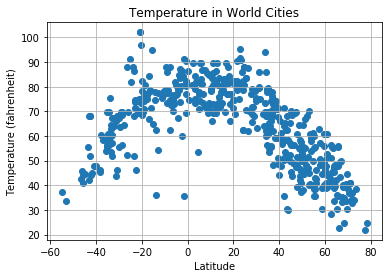

In [86]:
plt.scatter(weather_data["latitude"], weather_data["temp"], marker="o")

# Incorporate the other graph properties
plt.title("Temperature in World Cities")
plt.ylabel("Temperature (fahrenheit)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("TemperatureInWorldCities.png")

# Show plot
plt.show()


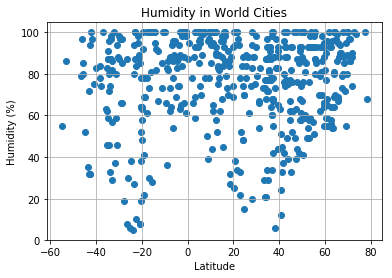

In [87]:
plt.scatter(weather_data["latitude"], weather_data["humidity"], marker="o")

# Incorporate the other graph properties
plt.title("Humidity in World Cities")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("HumidityInWorldCities.png")

# Show plot
plt.show()

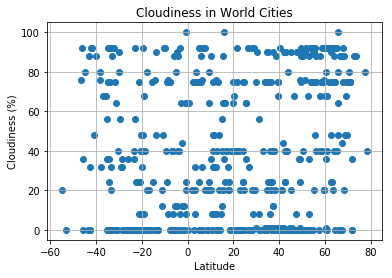

In [88]:
plt.scatter(weather_data["latitude"], weather_data["Cloudiness"], marker="o")

# Incorporate the other graph properties
plt.title("Cloudiness in World Cities")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("CloudinessInWorldCities.png")

# Show plot
plt.show()

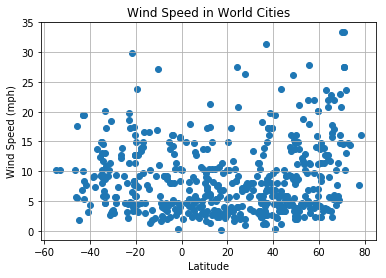

In [89]:
plt.scatter(weather_data["latitude"], weather_data["Wind_Speed"], marker="o")

# Incorporate the other graph properties
plt.title("Wind Speed in World Cities")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Wind SpeedInWorldCities.png")

# Show plot
plt.show()

Observations:
1. The temperature rises the closer to zero degrees latitude
2. the greatest range in humidity is around 20 to 40 degrees from equator
3. cloudiness appears to be independent of latitude with no observable correlation
